Load the packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing

**POLYNOMIAL DATA**
--
Consider a polynomial model: 
(Data is synthetically generated)




In [ ]:
import numpy.polynomial.polynomial as poly

#True model parameters 
beta = np.array([1, 0.5, 0, 2])  #Coefficients -> b0, b1, b2 
wstd = 0.4                      #noise
dtrue = len(beta)-1             #True poly degree
#print(dtrue)

#Independent data
nsamp = 100
xdat = np.random.uniform(-1,1,nsamp)  #Creates a dataset with 100 random sampeles between uniformly distributed between -1 and 1

#polynomial 
y0 = poly.polyval(xdat, beta) #Write down the polynomial 
ydat = y0 + np.random.normal(0, wstd, nsamp) #Add noise. 

Plot the generated data

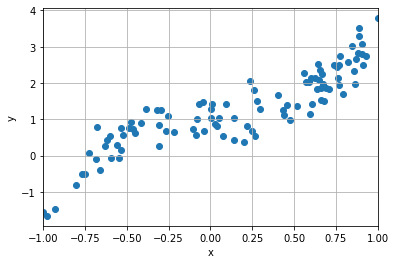

In [ ]:
plt.scatter(xdat, ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Plot the True function

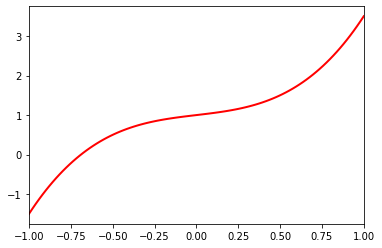

In [ ]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(-1,1)
plt.plot(xp, yp, 'r-', linewidth=2.0)

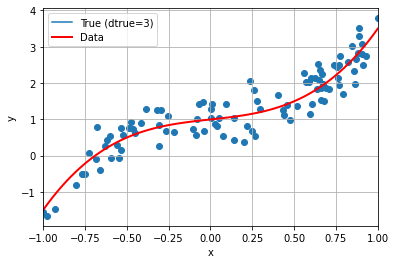

In [ ]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(-1,1)
plt.plot(xp, yp, 'r-', linewidth=2.0)

plt.scatter(xdat, ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['True (dtrue=3)', 'Data'], loc='upper left')
plt.show()

**Fit Model of Different Model Orders**
---
**Suppose that we know the true model order (d=3)** but we don't know the coefficients. 

We can estimate via linear regression using linear regression methods in the sklearn package. 

Text(0, 0.5, 'y')

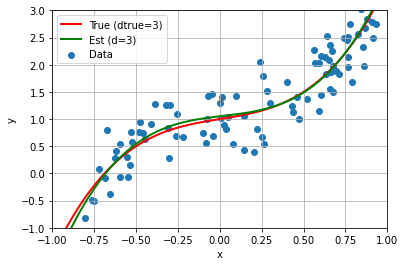

In [ ]:
d = 3
beta_hat = poly.polyfit(xdat,ydat,d)

#Plot true and estimated function
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)               #True
yp_hat = poly.polyval(xp,beta_hat)       #Esitmated
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=2)
plt.plot(xp,yp_hat,'g-',linewidth=2)

#Plot Data
plt.scatter(xdat, ydat)
plt.legend(['True (dtrue=3)', 'Est (d=3)', 'Data'], loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**What happens when d is unknown?:** One way is to use trial and error to find d.

**Underfitting** (D=1)

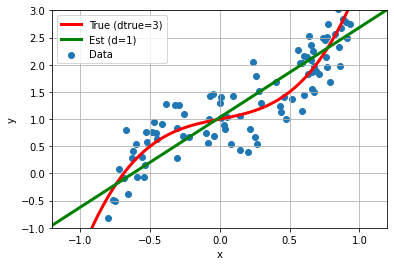

In [ ]:
d = 1
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=1)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

**Overfitting** (Suppose d=10)

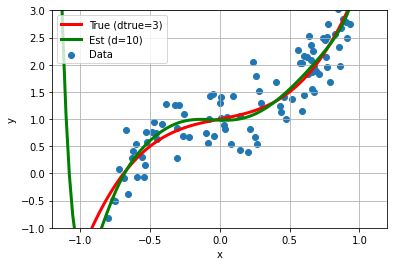

In [ ]:
d = 10
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1.2,1.2)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=10)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()


We can measure RSS for each model order and select the one with minimum RSS. **BAD IDEA!!!!**

We will always get minimum RSS for higher degree models! 

To avoid this, we use the concept of variance and bias.


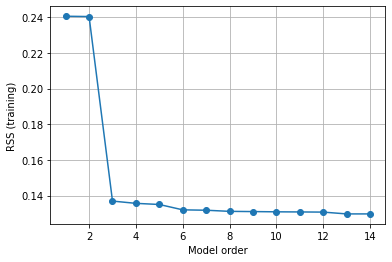

In [ ]:
dtest = np.array(range(1,15))
RSStr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xdat,ydat,d)
    
    # Measure RSS on training data
    yhat = poly.polyval(xdat,beta_hat)
    RSSd = np.mean((yhat-ydat)**2)
    RSStr.append(RSSd)
    
plt.plot(dtest,RSStr,'o-')
plt.xlabel('Model order')
plt.ylabel('RSS (training)')
plt.grid()

**Visualizing Bias and Vriance**
---
Bias(x) = f0(x) - E( f(x,beta) ) = true function - avg. estimated function 


In [ ]:
ntrial = 100    # Number of trials
dtest = [1,3,14]  # Model orders to test
nd = len(dtest)

# Values to plot true for the true function
nplot = 30
xp = np.linspace(-1,1,nplot)
yp = poly.polyval(xp,beta)
 
# Mean and std deviation for each model order
yp_hat_mean = np.zeros((nplot,nd))
yp_hat_std  = np.zeros((nplot,nd))

for j, d in enumerate(dtest):
    # Values to plot for the estimated functions
    yp_hat = np.zeros((nplot,ntrial))

    for it in range(ntrial):

        # Generate new test data.  Only the noise is varying from one trial to the next
        ydati = y0 + np.random.normal(0,wstd,nsamp)

        # Fit the model
        beta_hat = poly.polyfit(xdat,ydati,d)
        yp_hat[:,it] = poly.polyval(xp,beta_hat)

    # Compute expectation and std deviation over the trials
    yp_hat_mean[:,j] = np.mean(yp_hat, axis=1)
    yp_hat_std[:,j] = np.std(yp_hat, axis=1)

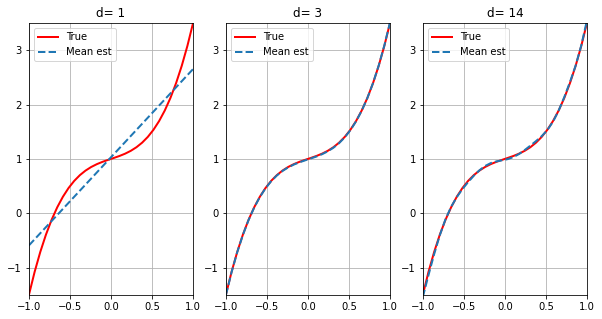

In [ ]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=2)     
    plt.plot(xp,yp_hat_mean[:,j], '--', linewidth=2)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Mean est'], loc='upper left')

Var(x) = E( f(x,beta) - E( f(x,beta) ) )^2  = Esitame around it's mean value. 


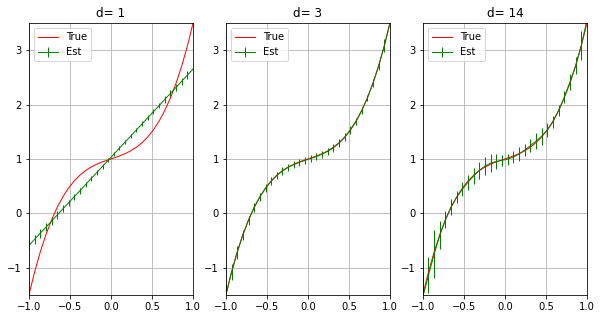

In [ ]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=1)     
    plt.errorbar(xp,yp_hat_mean[:,j],fmt='g-',yerr=yp_hat_std[:,j],linewidth=1)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Est'], loc='upper left')

Result:

Increasing model order => Decreases bias.

Decreasing model order => Decreases variance.

**Cross-Validation**
---
Create 2 samples: train & test.


In [ ]:
# Number of samples for training and test
ntr = nsamp // 2
nts = nsamp - ntr

# Training
xtr = xdat[:ntr]
ytr = ydat[:ntr]

# Test
xts = xdat[ntr:]
yts = ydat[ntr:]

Plot training and testing data separately.

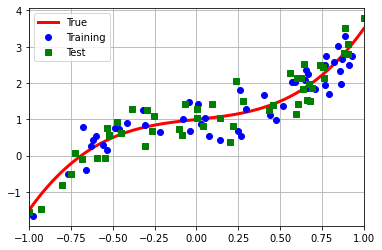

In [ ]:
# Plot true function
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=3)

# Plot data
plt.plot(xtr,ytr,'bo') #Training 
plt.plot(xts,yts,'gs') #Testing
plt.grid()
plt.legend(['True','Training','Test'],loc='upper left')


Performing cross-validation

(0.0, 1.0)

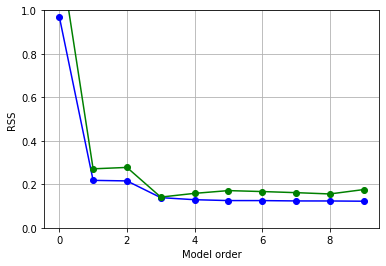

In [ ]:
dtest = np.array(range(0,10))
RSStest = []
RSStr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xtr,ytr,d)
    
    # Measure RSS on training data
    # This is not necessary, but we do it just to show the training error
    yhat = poly.polyval(xtr,beta_hat)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    
    # Measure RSS on test data
    yhat = poly.polyval(xts,beta_hat)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)
    
plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.xlabel('Model order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,1)